In [44]:
# https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/2.1-a-first-look-at-a-neural-network.ipynb
import keras
keras.__version__

'2.2.4'

In [34]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [35]:
train_images.shape

(60000, 28, 28)

In [36]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [37]:
# network.get_output_at(0)
network.output_shape

(None, 10)

In [38]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [39]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [40]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [46]:
train_labels.shape
train_images.shape

(60000, 784)

In [41]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.2531 - acc: 0.9268
Epoch 2/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.1032 - acc: 0.9700
Epoch 3/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.0690 - acc: 0.9792
Epoch 4/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.0498 - acc: 0.9844
Epoch 5/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.0381 - acc: 0.9883


In [42]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 26us/step


In [69]:
print('test_acc:', test_acc)

test_acc: 0.9816


In [87]:
np.argmax(network.predict(np.expand_dims(test_images[0], 0)))

7

actual result: 4
predicted result: 4


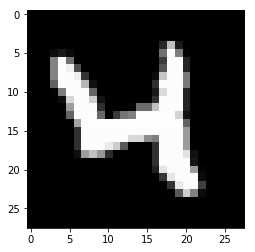

In [93]:
from matplotlib import pyplot
index = 20
pyplot.imshow(train_images[index].reshape((28, 28)), cmap="gray")
print('actual result:',np.argmax(train_labels[index]))
res = np.argmax(network.predict(np.expand_dims(train_images[index], 0)))
print('predicted result:',res)

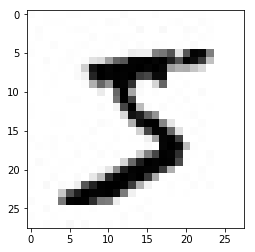

In [116]:
from matplotlib import pyplot as plot
path = '/Users/seeni-2328/Downloads/_chrome/_delete/check.jpg'
# path = 'Screenshot_20190131_094933.png'
image = plot.imread(path)
image.shape
pyplot.imshow(image.reshape((28, 28)), cmap="gray")


In [121]:
np.argsort(image)
image

array([[253, 255, 254, 255, 255, 254, 254, 255, 255, 255, 255, 255, 252,
        255, 255, 255, 253, 255, 255, 255, 254, 254, 254, 255, 255, 255,
        255, 255],
       [255, 255, 254, 254, 254, 255, 255, 255, 254, 255, 252, 253, 255,
        253, 255, 255, 255, 255, 254, 253, 255, 255, 252, 254, 255, 255,
        255, 255],
       [255, 252, 255, 255, 255, 254, 253, 253, 255, 255, 255, 255, 255,
        255, 249, 255, 255, 249, 255, 255, 251, 252, 255, 253, 255, 255,
        255, 255],
       [255, 253, 255, 255, 255, 255, 255, 255, 252, 255, 254, 253, 254,
        254, 255, 255, 255, 255, 255, 255, 253, 255, 253, 254, 255, 255,
        255, 255],
       [254, 255, 255, 252, 255, 255, 254, 253, 255, 255, 254, 255, 253,
        255, 252, 255, 253, 254, 255, 254, 255, 251, 255, 255, 255, 255,
        255, 255],
       [253, 255, 255, 255, 255, 253, 254, 255, 254, 253, 255, 255, 251,
        235, 238, 238, 128, 118,  84, 226,  87,   4,   8, 126, 255, 255,
        255, 255],
       [25

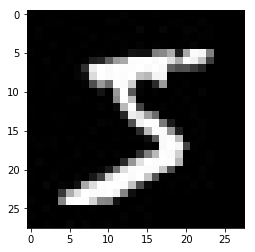

In [112]:
image = plot.imread(path)
test_image = image.reshape(28 * 28)
# print(test_image[:5])
test_image = 1 - (test_image.astype('float32') / 255)
# print(test_image[:5])
test_images = 1 - test_image
# print(test_image[:5])
pyplot.imshow(test_image.reshape((28, 28)), cmap="gray")
# test_images = test_images.astype('float32') / 255

In [111]:
np.argmax(network.predict(np.expand_dims(test_image, 0)))

5